# Lab 11

#### Q1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('Week11Q1.csv')
data

,x,y
0,1,1
1,3,2
2,9,1
3,3,7
4,7,2
5,9,7
6,4,8
7,8,3
8,1,4


In [3]:
points = data.values
points

array([[1, 1],
       [3, 2],
       [9, 1],
       [3, 7],
       [7, 2],
       [9, 7],
       [4, 8],
       [8, 3],
       [1, 4]])

In [4]:
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

In [5]:
def distance_matrix(points):
    num_points = points.shape[0]
    dist_matrix = np.zeros((num_points, num_points))
    for i in range(num_points):
        for j in range(num_points):
            dist_matrix[i, j] = euclidean_distance(points[i], points[j])
    return dist_matrix

In [6]:
def single_linkage(dist_matrix, clusters):
    min_dist = float('inf')
    cluster_pair = (-1, -1)
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            dist = min(dist_matrix[clusters[i][:, None], clusters[j]].flatten())
            if dist < min_dist:
                min_dist = dist
                cluster_pair = (i, j)
    return cluster_pair, min_dist

In [7]:
def complete_linkage(dist_matrix, clusters):
    max_dist = float('-inf')
    cluster_pair = (-1, -1)
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            dist = max(dist_matrix[clusters[i][:, None], clusters[j]].flatten())
            if dist > max_dist:
                max_dist = dist
                cluster_pair = (i, j)
    return cluster_pair, max_dist

In [8]:
def average_linkage(dist_matrix, clusters):
    min_avg_dist = float('inf')
    cluster_pair = (-1, -1)
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            dist = np.mean(dist_matrix[clusters[i][:, None], clusters[j]].flatten())
            if dist < min_avg_dist:
                min_avg_dist = dist
                cluster_pair = (i, j)
    return cluster_pair, min_avg_dist

In [9]:
def hierarchical_clustering(points, linkage_method):
    num_points = points.shape[0]
    dist_matrix = distance_matrix(points)
    clusters = [np.array([i]) for i in range(num_points)]
    while len(clusters) > 1:
        if linkage_method == 1:
            pair, min_dist = single_linkage(dist_matrix, clusters)
        elif linkage_method == 2:
            pair, min_dist = complete_linkage(dist_matrix, clusters)
        elif linkage_method == 3:
            pair, min_dist = average_linkage(dist_matrix, clusters)
        new_cluster = np.concatenate((clusters[pair[0]], clusters[pair[1]]))
        clusters.append(new_cluster)
        clusters.pop(max(pair))
        clusters.pop(min(pair))
        print(f'Merged clusters: {pair} with distance: {min_dist}')

In [10]:
print("\nSingle Linkage Clustering:")
hierarchical_clustering(points, 1)


Single Linkage Clustering:
Merged clusters: (3, 6) with distance: 1.4142135623730951
Merged clusters: (3, 5) with distance: 1.4142135623730951
Merged clusters: (0, 1) with distance: 2.23606797749979
Merged clusters: (0, 4) with distance: 2.23606797749979
Merged clusters: (1, 3) with distance: 2.8284271247461903
Merged clusters: (1, 3) with distance: 3.605551275463989
Merged clusters: (1, 2) with distance: 4.0
Merged clusters: (0, 1) with distance: 4.123105625617661


In [11]:
print("\nComplete Linkage Clustering:")
hierarchical_clustering(points, 2)


Complete Linkage Clustering:
Merged clusters: (0, 5) with distance: 10.0
Merged clusters: (1, 4) with distance: 8.602325267042627
Merged clusters: (4, 5) with distance: 8.54400374531753
Merged clusters: (4, 5) with distance: 8.54400374531753
Merged clusters: (1, 4) with distance: 8.48528137423857
Merged clusters: (0, 3) with distance: 7.810249675906654
Merged clusters: (1, 2) with distance: 7.280109889280518
Merged clusters: (0, 1) with distance: 6.708203932499369


In [12]:
print("\nAverage Linkage Clustering:")
hierarchical_clustering(points, 3)


Average Linkage Clustering:
Merged clusters: (3, 6) with distance: 1.4142135623730951
Merged clusters: (3, 5) with distance: 1.4142135623730951
Merged clusters: (0, 1) with distance: 2.23606797749979
Merged clusters: (0, 4) with distance: 2.23606797749979
Merged clusters: (1, 3) with distance: 2.914213562373095
Merged clusters: (0, 2) with distance: 5.169423477584055
Merged clusters: (0, 1) with distance: 5.604773705327147
Merged clusters: (0, 1) with distance: 6.9471368780942795


#### Q2

In [13]:
def calculate_sse(points, labels):
    sse = 0
    for cluster in np.unique(labels):
        cluster_points = points[labels == cluster]
        centroid = np.mean(cluster_points, axis=0)
        sse += np.sum((cluster_points - centroid) ** 2)
    return sse

In [14]:
def proximity_matrix(points, metric):
    if metric == 'euclidean':
        return squareform(pdist(points, metric='euclidean'))
    elif metric == 'manhattan':
        return squareform(pdist(points, metric='cityblock'))
    elif metric == 'minkowski':
        return squareform(pdist(points, metric='minkowski', p=3))
    else:
        raise ValueError("Metric not supported.")

In [15]:
def plot_sse(points):
    sse_values = []
    max_clusters = min(10, len(points))
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(points)
        sse = kmeans.inertia_
        sse_values.append(sse)
    plt.figure()
    plt.plot(range(1, max_clusters + 1), sse_values, marker='o')
    plt.title('Number of Clusters vs SSE')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.xticks(range(1, max_clusters + 1))
    plt.grid()
    plt.show()


In [16]:
def plot_dendrogram(points):
    plt.figure(figsize=(15, 10))
    linkage_methods = ['single', 'complete', 'average']
    for i, method in enumerate(linkage_methods):
        plt.subplot(2, 3, i + 1)
        Z = linkage(points, method=method)
        dendrogram(Z, labels=data.index + 1)
        plt.title(f'Dendrogram - {method.capitalize()} Linkage')
        plt.xlabel('Index')
        plt.grid()
        plt.ylabel('Distance')
    plt.tight_layout()
    plt.show()

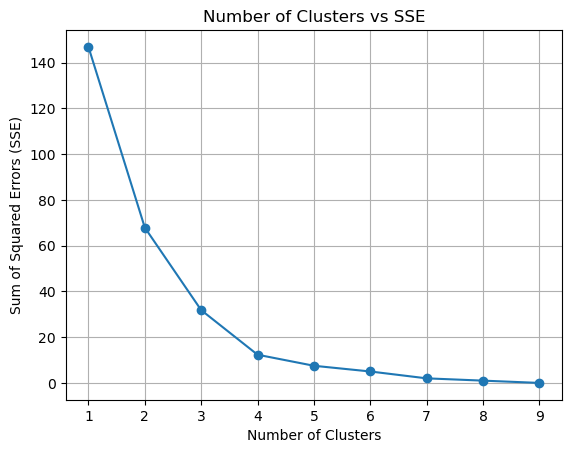

In [17]:
plot_sse(data.values)

In [18]:
print("Euclidean Distance Proximity Matrix:\n", proximity_matrix(points, 'euclidean'))

Euclidean Distance Proximity Matrix:
 [[ 0.          2.23606798  8.          6.32455532  6.08276253 10.
   7.61577311  7.28010989  3.        ]
 [ 2.23606798  0.          6.08276253  5.          4.          7.81024968
   6.08276253  5.09901951  2.82842712]
 [ 8.          6.08276253  0.          8.48528137  2.23606798  6.
   8.60232527  2.23606798  8.54400375]
 [ 6.32455532  5.          8.48528137  0.          6.40312424  6.
   1.41421356  6.40312424  3.60555128]
 [ 6.08276253  4.          2.23606798  6.40312424  0.          5.38516481
   6.70820393  1.41421356  6.32455532]
 [10.          7.81024968  6.          6.          5.38516481  0.
   5.09901951  4.12310563  8.54400375]
 [ 7.61577311  6.08276253  8.60232527  1.41421356  6.70820393  5.09901951
   0.          6.40312424  5.        ]
 [ 7.28010989  5.09901951  2.23606798  6.40312424  1.41421356  4.12310563
   6.40312424  0.          7.07106781]
 [ 3.          2.82842712  8.54400375  3.60555128  6.32455532  8.54400375
   5.          7

In [19]:
print("\nManhattan Distance Proximity Matrix:\n", proximity_matrix(points, 'manhattan'))


Manhattan Distance Proximity Matrix:
 [[ 0.  3.  8.  8.  7. 14. 10.  9.  3.]
 [ 3.  0.  7.  5.  4. 11.  7.  6.  4.]
 [ 8.  7.  0. 12.  3.  6. 12.  3. 11.]
 [ 8.  5. 12.  0.  9.  6.  2.  9.  5.]
 [ 7.  4.  3.  9.  0.  7.  9.  2.  8.]
 [14. 11.  6.  6.  7.  0.  6.  5. 11.]
 [10.  7. 12.  2.  9.  6.  0.  9.  7.]
 [ 9.  6.  3.  9.  2.  5.  9.  0.  8.]
 [ 3.  4. 11.  5.  8. 11.  7.  8.  0.]]


In [20]:
print("\nMinkowski Distance Proximity Matrix:\n", proximity_matrix(points, 'minkowski'))


Minkowski Distance Proximity Matrix:
 [[0.         2.08008382 8.         6.07317794 6.00924501 8.99588289
  7.17905435 7.05400406 3.        ]
 [2.08008382 0.         6.00924501 5.         4.         6.98636803
  6.00924501 5.01329793 2.5198421 ]
 [8.         6.00924501 0.         7.5595263  2.08008382 6.
  7.76393608 2.08008382 8.13822304]
 [6.07317794 5.         7.5595263  0.         5.73879355 6.
  1.25992105 5.73879355 3.27106631]
 [6.00924501 4.         2.08008382 5.73879355 0.         5.10446872
  6.24025147 1.25992105 6.07317794]
 [8.99588289 6.98636803 6.         6.         5.10446872 0.
  5.01329793 4.02072576 8.13822304]
 [7.17905435 6.00924501 7.76393608 1.25992105 6.24025147 5.01329793
  0.         5.73879355 4.49794145]
 [7.05400406 5.01329793 2.08008382 5.73879355 1.25992105 4.02072576
  5.73879355 0.         7.00679612]
 [3.         2.5198421  8.13822304 3.27106631 6.07317794 8.13822304
  4.49794145 7.00679612 0.        ]]


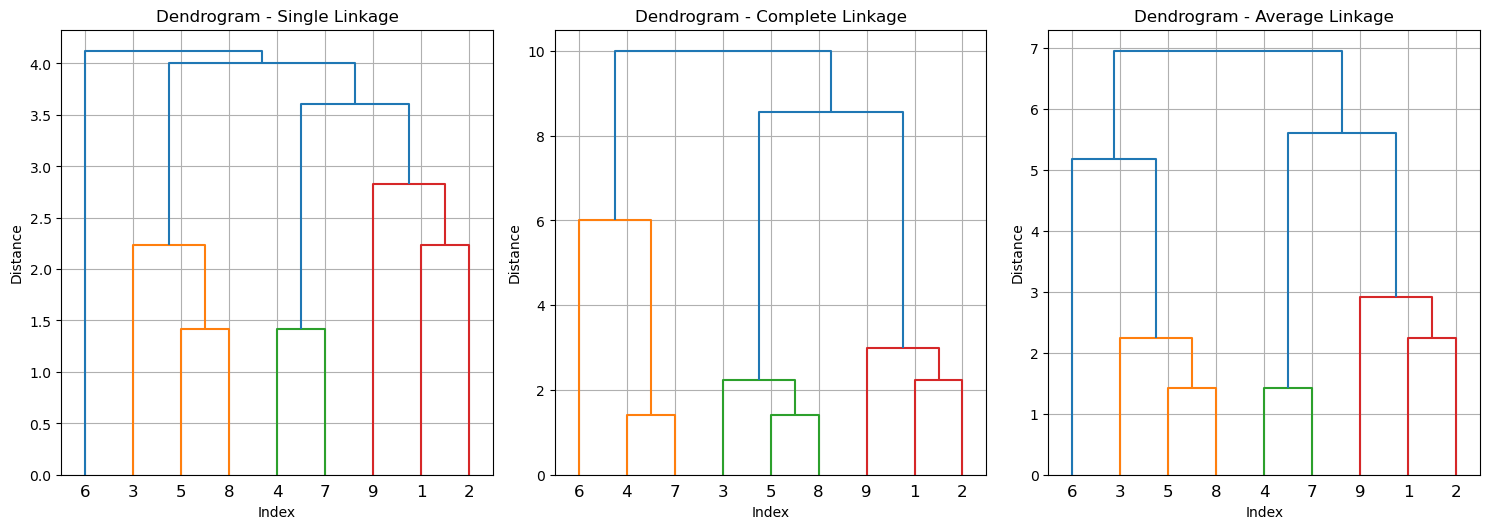

In [21]:
plot_dendrogram(points)